In [1]:
#pip install emoji

In [2]:
# # pip install arabicstopwords
# !pip install Arabic-Stopwords

In [3]:
import pandas as pd
import seaborn as sns
import re
#from arabert.preprocess import ArabertPreprocessor
import string
from imblearn.over_sampling import SMOTE
import pickle
import emoji
import arabicstopwords.arabicstopwords as stp
import json
import pyarabic.araby as araby
from nltk.stem.snowball import SnowballStemmer

In [77]:
#stp.stopwords_list()

### Import csv file

In [5]:
df=pd.read_csv('dialect_dataset.csv')

In [6]:
df

id dialect
0       1175358310087892992      IQ
1       1175416117793349632      IQ
2       1175450108898565888      IQ
3       1175471073770573824      IQ
4       1175496913145217024      IQ
...                     ...     ...
458192  1019484980282580992      BH
458193  1021083283709407232      BH
458194  1017477537889431552      BH
458195  1022430374696239232      BH
458196  1022409931029458944      BH

[458197 rows x 2 columns]

In [7]:
df.shape

(458197, 2)

### Check null values

In [8]:
df.isnull().sum()

id         0
dialect    0
dtype: int64

### import the dictionary --> keys=id, values=text

In [9]:
with open('data.json', 'rb') as fp:
    data = pickle.load(fp)

In [10]:
data['471056063672750080']

'Ôª± Ô∫∑ÔªÆÔªï ÔªóÔª†ÔÆß Ô∫ªÔ∫éÔ∫çÔ∫£Ô∫íÔÆè Ô∫©Ôª≠Ôª° Ôª≥ÔªÑÔ∫ÆÔª≥ÔÆè Ôª≠Ô∫éÔªßÔÆè Ô∫è ÔªóÔª†Ô∫íÔÆß ÔªüÔªÆ Ô∫óÔªÑÔªÆÔªù Ô∫éÔªüÔª§Ô∫¥Ô∫éÔ∫çÔªìÔª¨ÔÆßÔ∫Ä . .'

In [11]:
# for item in data.items():
#     print(item)

In [12]:
len(data)

458197

### Add all the data in one dataframe (text,label)

In [13]:
df1=pd.DataFrame.from_dict(data,orient='index',columns=['text'])

In [14]:
df1=df1.reset_index()

In [15]:
df1['id']=df1['index']

In [16]:
df1=df1.drop("index",axis=1)

In [17]:
df1 = df1[['id','text']]

In [18]:
df1['dialect']=df['dialect']

In [19]:
df1

id  \
0       1175358310087892992   
1       1175416117793349632   
2       1175450108898565888   
3       1175471073770573824   
4       1175496913145217024   
...                     ...   
458192  1019484980282580992   
458193  1021083283709407232   
458194  1017477537889431552   
458195  1022430374696239232   
458196  1022409931029458944   

                                                     text dialect  
0        @Nw8ieJUwaCAAreT ŸÑŸÉŸÜ ÿ®ÿßŸÑŸÜŸáÿßŸäÿ© .. ŸäŸÜÿ™ŸÅÿ∂ .. Ÿäÿ∫Ÿäÿ± .      IQ  
1       @7zNqXP0yrODdRjK ŸäÿπŸÜŸä Ÿáÿ∞ÿß ŸÖÿ≠ÿ≥Ÿàÿ® ÿπŸÑŸâ ÿßŸÑÿ®ÿ¥ÿ± .. ÿ≠...      IQ  
2                         @KanaanRema ŸÖÿ®ŸäŸÜ ŸÖŸÜ ŸÉŸÑÿßŸÖŸá ÿÆŸÑŸäÿ¨Ÿä      IQ  
3              @HAIDER76128900 Ÿäÿ≥ŸÑŸÖŸÑŸä ŸÖÿ±Ÿàÿ±ŸÉ Ÿàÿ±Ÿàÿ≠ŸÉ ÿßŸÑÿ≠ŸÑŸàŸáüíê      IQ  
4                      @hmo2406 ŸàŸäŸÜ ŸáŸÑ ÿßŸÑÿ∫Ÿäÿ®Ÿá  ÿßÿÆ ŸÖÿ≠ŸÖÿØ üå∏üå∫      IQ  
...                                                   ...     ...  
458192              @Al_mhbaa_7 ŸÖÿ®ÿ≥Ÿàÿ∑ŸäŸÜ ŸÖŸÜŸÉ ÿßŸÑŸÑŸä ÿ®ÿßÿ≥ÿ∑ÿßŸÜÿßüòÖ      BH  
458193       @Zzainabali @P_ameerah ŸàÿßŸÑŸÑŸá ŸÖÿßŸäŸÜÿØŸá ÿßÿ®ÿ¥ ŸäÿÆÿ™Ÿä      BH  
458194  @Al_mhbaa_7 ÿ¥Ÿà ÿπŸÖŸÑŸÜÿß ŸÑŸÉ ÿ≠ŸÜÿß ÿ™Ÿáÿ±ÿ®Ÿä ŸÖŸÜŸÜÿß ÿßÿ≠ŸÜÿß ŸÖÿ≥...      BH  
458195        @haneenalmwla ÿßŸÑŸÑŸá Ÿäÿ®ÿßÿ±ŸÉ ŸÅŸäŸáÿß Ÿàÿ®ÿßŸÑÿπÿßŸÅŸäŸá üòãüòãüòã      BH  
458196          @jolnar121 ÿßŸÑÿ≥ÿ≠ŸÑŸá ÿ∂ŸäŸÅŸä Ÿä ÿ®ÿ™ÿ∑ŸÑÿπ ŸÑŸÉ ÿ≥ÿ≠ŸÑŸäŸáüòÖüòÖ      BH  

[458197 rows x 3 columns]

In [20]:
df1.loc[458188,'text']

'@bhmesh @Jordaniancitizn @Ahmadkh51210191 Ÿäÿ¨ŸàŸÜ Ÿäÿ¥ŸàŸÅŸàŸÜ ÿßŸÑŸÑŸä ÿπŸÜÿØŸÜÿß ÿ≠ÿ™Ÿâ ÿ®ÿßÿ® ÿßŸÑÿ≥Ÿäÿßÿ±Ÿá ŸÑŸá ŸÜÿßÿ≥ ÿ™ŸÅÿ™ÿ≠ ŸÑŸáŸÖ üòÖ'

In [21]:
df1.isnull().sum()

id         0
text       0
dialect    0
dtype: int64

### Exploratory Data Analysis

Index(['EG', 'PL', 'KW', 'LY', 'QA', 'JO', 'LB', 'SA', 'AE', 'BH', 'OM', 'SY',
       'DZ', 'IQ', 'SD', 'MA', 'YE', 'TN'],
      dtype='object')


D:\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='dialect'>

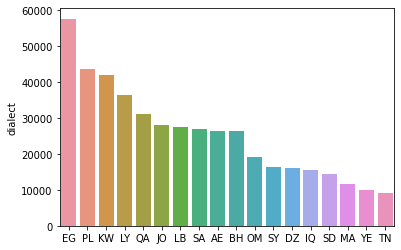

In [22]:
x=df1['dialect'].value_counts()
print(x.index)
sns.barplot(x.index,x)

### Cleaning text column

In [23]:
## remove words that are repeated in the text but they can not help the model to classify the dialects
def remove_common_words(doc_text1):
    list_c=["ÿßŸÑÿ¥ÿπÿ®","ÿßŸÑŸÉŸàŸäÿ™","ÿ™Ÿàÿ™Ÿäÿ±","ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©","ÿ±ŸÖÿ∂ÿßŸÜ","ŸàÿßŸÑŸÑŸá","ŸÑÿß ÿ≠ŸàŸÑ Ÿà ŸÑÿß ŸÇŸàÿ© ÿßŸÑÿß ÿ®ÿßŸÑŸÑŸá","ŸÖÿµÿ±","ÿßŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá","ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸá","ÿßÿ≥ÿ™ÿ∫ŸÅÿ± ÿßŸÑŸÑŸá ÿßŸÑÿπÿ∏ŸäŸÖ","ŸÑÿß ÿßŸÑŸá ÿßŸÑÿß ÿßŸÑŸÑŸá"]
    for i in list_c:
        if i in doc_text1:
            doc_text1=doc_text1.replace(i, "")
    return doc_text1        

In [24]:

def separate_punc(text):
    text=re.sub("\W"," ",text) ## remove non word characters
    text=re.sub("[a-zA-Z0-9_-]"," ",text) ## remove non-arabic characters
    text=re.sub("\d"," ",text) ## remove any number in the text
    text=text.strip()
    return text

In [25]:
## remove stop words
def remove_stop_words(doc_text):
    l=doc_text.split(" ")
    l1=" ".join([word for word in l if word not in stp.stopwords_list()])
    return l1

In [26]:
## remove weird characters
def removeWeirdChars(text):
    weirdPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weirdPatterns.sub(r'', text)

In [27]:
##remove_extra_white_spaces
def remove_extra_white_spaces(text):
    without_sc = re.sub(pattern="\s+", repl=" ", string=text)
    return without_sc

In [28]:
def clean_text(text):
    text=araby.strip_diacritics(text) ## remove tashkeel
    p_longation = re.compile(r'(.)\1+') ## remove longation
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text) 
    text = text.replace("ÿ©","Ÿá")
    #text = text.replace("Ÿä","Ÿâ")
    text = text.replace("ÿ£","ÿß")
    text = text.replace("ÿ¢","ÿß")
        
    text = text.strip()
    
    return text

In [29]:
clean_text("ÿßŸÑŸÑŸëŸéŸáŸÖŸëŸé ÿßÿ∫ŸíŸÅŸêÿ±Ÿí ŸÑŸÜŸéÿß ŸàŸÑŸàÿßŸÑÿØŸêŸäŸÜŸéÿß")

'ÿßŸÑŸÑŸáŸÖ ÿßÿ∫ŸÅÿ± ŸÑŸÜÿß ŸàŸÑŸàÿßŸÑÿØŸäŸÜÿß'

In [30]:
def stemming(text):
    ar_stemmer = SnowballStemmer("arabic")
    ar_stemmer.stem(text)
    return text

In [31]:
stemming(remove_extra_white_spaces(separate_punc(clean_text(remove_stop_words('@bhmesh @Jordaniancitizn @Ahmadkh51210191 Ÿäÿ¨ŸàŸÜ Ÿäÿ¥ŸàŸÅŸàŸÜ ÿßŸÑŸÑŸä ÿπŸÜÿØŸÜÿß ÿ≠ÿ™Ÿâ ÿ®ÿßÿ® ÿßŸÑÿ≥Ÿäÿßÿ±Ÿá ŸÑŸá ŸÜÿßÿ≥ ÿ™ŸÅÿ™ÿ≠ ŸÑŸáŸÖ üòÖ')))))

'Ÿäÿ¨ŸàŸÜ Ÿäÿ¥ŸàŸÅŸàŸÜ ÿßŸÑŸÑŸä ÿ®ÿßÿ® ÿßŸÑÿ≥Ÿäÿßÿ±Ÿá ŸÜÿßÿ≥ ÿ™ŸÅÿ™ÿ≠'

In [32]:
df1['text_up1']=df1['text'].apply(remove_stop_words)

In [33]:
df1['text_up2']=df1['text_up1'].apply(clean_text)

In [34]:
df1['tokens1']=df1['text_up2'].apply(separate_punc)

In [35]:
df1['tokens2']=df1['tokens1'].apply(removeWeirdChars)

In [36]:
df1['tokens3']=df1['tokens2'].apply(remove_common_words)

In [37]:
df1['tokens4']=df1['tokens3'].apply(remove_extra_white_spaces)

In [38]:
df1['tokens']=df1['tokens4'].apply(stemming)

In [39]:
df1

id  \
0       1175358310087892992   
1       1175416117793349632   
2       1175450108898565888   
3       1175471073770573824   
4       1175496913145217024   
...                     ...   
458192  1019484980282580992   
458193  1021083283709407232   
458194  1017477537889431552   
458195  1022430374696239232   
458196  1022409931029458944   

                                                     text dialect  \
0        @Nw8ieJUwaCAAreT ŸÑŸÉŸÜ ÿ®ÿßŸÑŸÜŸáÿßŸäÿ© .. ŸäŸÜÿ™ŸÅÿ∂ .. Ÿäÿ∫Ÿäÿ± .      IQ   
1       @7zNqXP0yrODdRjK ŸäÿπŸÜŸä Ÿáÿ∞ÿß ŸÖÿ≠ÿ≥Ÿàÿ® ÿπŸÑŸâ ÿßŸÑÿ®ÿ¥ÿ± .. ÿ≠...      IQ   
2                         @KanaanRema ŸÖÿ®ŸäŸÜ ŸÖŸÜ ŸÉŸÑÿßŸÖŸá ÿÆŸÑŸäÿ¨Ÿä      IQ   
3              @HAIDER76128900 Ÿäÿ≥ŸÑŸÖŸÑŸä ŸÖÿ±Ÿàÿ±ŸÉ Ÿàÿ±Ÿàÿ≠ŸÉ ÿßŸÑÿ≠ŸÑŸàŸáüíê      IQ   
4                      @hmo2406 ŸàŸäŸÜ ŸáŸÑ ÿßŸÑÿ∫Ÿäÿ®Ÿá  ÿßÿÆ ŸÖÿ≠ŸÖÿØ üå∏üå∫      IQ   
...                                                   ...     ...   
458192              @Al_mhbaa_7 ŸÖÿ®ÿ≥Ÿàÿ∑ŸäŸÜ ŸÖŸÜŸÉ ÿßŸÑŸÑŸä ÿ®ÿßÿ≥ÿ∑ÿßŸÜÿßüòÖ      BH   
458193       @Zzainabali @P_ameerah ŸàÿßŸÑŸÑŸá ŸÖÿßŸäŸÜÿØŸá ÿßÿ®ÿ¥ ŸäÿÆÿ™Ÿä      BH   
458194  @Al_mhbaa_7 ÿ¥Ÿà ÿπŸÖŸÑŸÜÿß ŸÑŸÉ ÿ≠ŸÜÿß ÿ™Ÿáÿ±ÿ®Ÿä ŸÖŸÜŸÜÿß ÿßÿ≠ŸÜÿß ŸÖÿ≥...      BH   
458195        @haneenalmwla ÿßŸÑŸÑŸá Ÿäÿ®ÿßÿ±ŸÉ ŸÅŸäŸáÿß Ÿàÿ®ÿßŸÑÿπÿßŸÅŸäŸá üòãüòãüòã      BH   
458196          @jolnar121 ÿßŸÑÿ≥ÿ≠ŸÑŸá ÿ∂ŸäŸÅŸä Ÿä ÿ®ÿ™ÿ∑ŸÑÿπ ŸÑŸÉ ÿ≥ÿ≠ŸÑŸäŸáüòÖüòÖ      BH   

                                                 text_up1  \
0            @Nw8ieJUwaCAAreT ÿ®ÿßŸÑŸÜŸáÿßŸäÿ© .. ŸäŸÜÿ™ŸÅÿ∂ .. Ÿäÿ∫Ÿäÿ± .   
1       @7zNqXP0yrODdRjK ŸäÿπŸÜŸä ŸÖÿ≠ÿ≥Ÿàÿ® ÿßŸÑÿ®ÿ¥ÿ± .. ÿ≠ŸäŸàŸÜŸá ŸàŸàÿ≠...   
2                            @KanaanRema ŸÖÿ®ŸäŸÜ ŸÉŸÑÿßŸÖŸá ÿÆŸÑŸäÿ¨Ÿä   
3              @HAIDER76128900 Ÿäÿ≥ŸÑŸÖŸÑŸä ŸÖÿ±Ÿàÿ±ŸÉ Ÿàÿ±Ÿàÿ≠ŸÉ ÿßŸÑÿ≠ŸÑŸàŸáüíê   
4                         @hmo2406 ŸàŸäŸÜ ÿßŸÑÿ∫Ÿäÿ®Ÿá  ÿßÿÆ ŸÖÿ≠ŸÖÿØ üå∏üå∫   
...                                                   ...   
458192                  @Al_mhbaa_7 ŸÖÿ®ÿ≥Ÿàÿ∑ŸäŸÜ ÿßŸÑŸÑŸä ÿ®ÿßÿ≥ÿ∑ÿßŸÜÿßüòÖ   
458193       @Zzainabali @P_ameerah ŸàÿßŸÑŸÑŸá ŸÖÿßŸäŸÜÿØŸá ÿßÿ®ÿ¥ ŸäÿÆÿ™Ÿä   
458194  @Al_mhbaa_7 ÿ¥Ÿà ÿπŸÖŸÑŸÜÿß ÿ≠ŸÜÿß ÿ™Ÿáÿ±ÿ®Ÿä ÿßÿ≠ŸÜÿß ŸÖÿ≥ÿßŸÉŸäŸÜ ŸÑŸäÿ¥...   
458195             @haneenalmwla ÿßŸÑŸÑŸá Ÿäÿ®ÿßÿ±ŸÉ Ÿàÿ®ÿßŸÑÿπÿßŸÅŸäŸá üòãüòãüòã   
458196               @jolnar121 ÿßŸÑÿ≥ÿ≠ŸÑŸá ÿ∂ŸäŸÅŸä ÿ®ÿ™ÿ∑ŸÑÿπ ÿ≥ÿ≠ŸÑŸäŸáüòÖüòÖ   

                                                 text_up2  \
0            @Nw8ieJUwaCAAreT ÿ®ÿßŸÑŸÜŸáÿßŸäŸá .. ŸäŸÜÿ™ŸÅÿ∂ .. Ÿäÿ∫Ÿäÿ± .   
1       @7zNqXP0yrODdRjK ŸäÿπŸÜŸä ŸÖÿ≠ÿ≥Ÿàÿ® ÿßŸÑÿ®ÿ¥ÿ± .. ÿ≠ŸäŸàŸÜŸá ŸàŸàÿ≠...   
2                            @KanaanRema ŸÖÿ®ŸäŸÜ ŸÉŸÑÿßŸÖŸá ÿÆŸÑŸäÿ¨Ÿä   
3              @HAIDER76128900 Ÿäÿ≥ŸÑŸÖŸÑŸä ŸÖÿ±Ÿàÿ±ŸÉ Ÿàÿ±Ÿàÿ≠ŸÉ ÿßŸÑÿ≠ŸÑŸàŸáüíê   
4                         @hmo2406 ŸàŸäŸÜ ÿßŸÑÿ∫Ÿäÿ®Ÿá  ÿßÿÆ ŸÖÿ≠ŸÖÿØ üå∏üå∫   
...                                                   ...   
458192                  @Al_mhbaa_7 ŸÖÿ®ÿ≥Ÿàÿ∑ŸäŸÜ ÿßŸÑŸÑŸä ÿ®ÿßÿ≥ÿ∑ÿßŸÜÿßüòÖ   
458193       @Zzainabali @P_ameerah ŸàÿßŸÑŸÑŸá ŸÖÿßŸäŸÜÿØŸá ÿßÿ®ÿ¥ ŸäÿÆÿ™Ÿä   
458194  @Al_mhbaa_7 ÿ¥Ÿà ÿπŸÖŸÑŸÜÿß ÿ≠ŸÜÿß ÿ™Ÿáÿ±ÿ®Ÿä ÿßÿ≠ŸÜÿß ŸÖÿ≥ÿßŸÉŸäŸÜ ŸÑŸäÿ¥...   
458195              @haneenalmwla ÿßŸÑŸÑŸá Ÿäÿ®ÿßÿ±ŸÉ Ÿàÿ®ÿßŸÑÿπÿßŸÅŸäŸá üòãüòã   
458196               @jolnar121 ÿßŸÑÿ≥ÿ≠ŸÑŸá ÿ∂ŸäŸÅŸä ÿ®ÿ™ÿ∑ŸÑÿπ ÿ≥ÿ≠ŸÑŸäŸáüòÖüòÖ   

                                                  tokens1  \
0                               ÿ®ÿßŸÑŸÜŸáÿßŸäŸá    ŸäŸÜÿ™ŸÅÿ∂    Ÿäÿ∫Ÿäÿ±   
1       ŸäÿπŸÜŸä ŸÖÿ≠ÿ≥Ÿàÿ® ÿßŸÑÿ®ÿ¥ÿ±    ÿ≠ŸäŸàŸÜŸá ŸàŸàÿ≠ÿ¥ŸäŸá    Ÿàÿ™ÿ∑ŸÑÿ®ŸàŸÜ ÿßŸÑ...   
2                                        ŸÖÿ®ŸäŸÜ ŸÉŸÑÿßŸÖŸá ÿÆŸÑŸäÿ¨Ÿä   
3                               Ÿäÿ≥ŸÑŸÖŸÑŸä ŸÖÿ±Ÿàÿ±ŸÉ Ÿàÿ±Ÿàÿ≠ŸÉ ÿßŸÑÿ≠ŸÑŸàŸá   
4                                     ŸàŸäŸÜ ÿßŸÑÿ∫Ÿäÿ®Ÿá  ÿßÿÆ ŸÖÿ≠ŸÖÿØ   
...                                                   ...   
458192                               ŸÖÿ®ÿ≥Ÿàÿ∑ŸäŸÜ ÿßŸÑŸÑŸä ÿ®ÿßÿ≥ÿ∑ÿßŸÜÿß   
458193                              ŸàÿßŸÑŸÑŸá ŸÖÿßŸäŸÜÿØŸá ÿßÿ®ÿ¥ ŸäÿÆÿ™Ÿä   
4

In [40]:
df1['text'][4]

'@hmo2406 ŸàŸäŸÜ ŸáŸÑ ÿßŸÑÿ∫Ÿäÿ®Ÿá  ÿßÿÆ ŸÖÿ≠ŸÖÿØ üå∏üå∫'

In [41]:
df1['tokens'][4]

'ŸàŸäŸÜ ÿßŸÑÿ∫Ÿäÿ®Ÿá ÿßÿÆ ŸÖÿ≠ŸÖÿØ'

### compute the average of number of words for each dialect

In [42]:
df1['word_count'] = df1['tokens'].apply(lambda x: len(str(x).split())) 
print("the mean of number of words for EG is"+" "+str(df1[df1['dialect']=='EG']['word_count'].mean())) #EG TEXT
print("the mean of number of words for PL is"+" "+str(df1[df1['dialect']=='PL']['word_count'].mean())) #PL TEXT
print("the mean of number of words for KW is"+" "+str(df1[df1['dialect']=='KW']['word_count'].mean())) #KW TEXT
print("the mean of number of words for LY is"+" "+str(df1[df1['dialect']=='LY']['word_count'].mean())) #LY TEXT
print("the mean of number of words for QA is"+" "+str(df1[df1['dialect']=='QA']['word_count'].mean())) #QA TEXT
print("the mean of number of words for JO is"+" "+str(df1[df1['dialect']=='JO']['word_count'].mean())) #JO TEXT
print("the mean of number of words for LB is"+" "+str(df1[df1['dialect']=='LB']['word_count'].mean())) #LB TEXT
print("the mean of number of words for SA is"+" "+str(df1[df1['dialect']=='SA']['word_count'].mean())) #SA TEXT
print("the mean of number of words for AE is"+" "+str(df1[df1['dialect']=='AE']['word_count'].mean())) #AE TEXT
print("the mean of number of words for BH is"+" "+str(df1[df1['dialect']=='BH']['word_count'].mean())) #BH TEXT
print("the mean of number of words for OM is"+" "+str(df1[df1['dialect']=='OM']['word_count'].mean())) #OM TEXT
print("the mean of number of words for SY is"+" "+str(df1[df1['dialect']=='SY']['word_count'].mean())) #SY TEXT
print("the mean of number of words for DZ is"+" "+str(df1[df1['dialect']=='DZ']['word_count'].mean())) #DZ TEXT
print("the mean of number of words for IQ is"+" "+str(df1[df1['dialect']=='IQ']['word_count'].mean())) #IQ TEXT
print("the mean of number of words for SD is"+" "+str(df1[df1['dialect']=='SD']['word_count'].mean())) #SD TEXT
print("the mean of number of words for MA is"+" "+str(df1[df1['dialect']=='MA']['word_count'].mean())) #MA TEXT
print("the mean of number of words for YE is"+" "+str(df1[df1['dialect']=='YE']['word_count'].mean())) #YE TEXT
print("the mean of number of words for TN is"+" "+str(df1[df1['dialect']=='TN']['word_count'].mean())) #TN TEXT

the mean of number of words for EG is 12.404486779096398
the mean of number of words for PL is 9.572264642677519
the mean of number of words for KW is 11.71690137500297
the mean of number of words for LY is 10.084796843749144
the mean of number of words for QA is 12.235025266342657
the mean of number of words for JO is 9.83367357902654
the mean of number of words for LB is 11.266068001593222
the mean of number of words for SA is 11.254025044722718
the mean of number of words for AE is 11.025935503498632
the mean of number of words for BH is 9.827780313403316
the mean of number of words for OM is 9.1476250261561
the mean of number of words for SY is 9.832286664203917
the mean of number of words for DZ is 10.36699005128839
the mean of number of words for IQ is 9.88733303219978
the mean of number of words for SD is 11.341208258279064
the mean of number of words for MA is 10.342923996880145
the mean of number of words for YE is 9.532587891608744
the mean of number of words for TN is 11.454

## Divide the dataframe into 5 dataframes 
### 1- df_maghreb for maghrab group which contains 4 subgroups DZ,TN,MA,and LY
### 2- df_nile_basin for nile basin group which contains 2 subgroups EG,SD
### 3- df_levant for levant group which contains 4 subgroups SY,JO,LB,and PL
### 4- df_gulf for gulf group which contains 6 subgroups 'KW', 'QA', 'SA', 'AE', 'BH',and 'OM'
### 5- df_main contains maghreb,nile_basin,levant,gulf,IQ,and YE

In [43]:
df2=df1[['tokens','dialect']]

In [44]:
#df1.loc[df1['tokens']==' ']
blanks=[]
for row,row1,row2 in df2.itertuples():
    if row1.isspace() or row1=='':
        blanks.append(row)
print(blanks)
df2.drop(blanks, axis=0, inplace=True)

[2793, 4457, 4458, 5611, 11433, 11434, 14196, 18586, 18608, 19488, 22372, 23903, 24414, 32455, 33021, 33194, 35881, 39523, 40678, 40981, 41041, 41080, 44642, 44797, 46403, 52716, 64546, 64556, 82978, 91890, 95884, 99772, 100396, 100408, 100428, 111761, 116966, 120209, 129423, 132982, 134108, 134120, 137565, 137737, 140234, 141413, 148127, 150371, 152576, 156809, 157101, 157353, 161164, 162592, 162806, 167097, 168197, 169986, 170243, 175243, 175248, 175249, 175252, 175258, 175371, 182515, 182937, 188667, 193781, 212439, 218121, 218162, 221384, 223296, 223794, 223808, 223813, 226782, 226876, 236356, 240096, 261418, 288194, 288257, 288304, 291784, 291976, 297057, 297071, 297081, 297142, 297157, 297164, 297170, 297185, 299430, 304205, 323414, 330288, 340666, 351869, 351984, 355920, 368871, 375834, 377235, 381985, 384406, 386899, 387429, 388765, 391808, 391809, 391810, 391848, 391849, 391850, 391907, 391908, 391923, 391930, 391931, 391951, 391958, 391960, 391961, 391962, 392353, 393059, 393

D:\anaconda1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
df2.loc[df2['tokens']==' ']

Empty DataFrame
Columns: [tokens, dialect]
Index: []

## Maghreb

In [46]:
df_Maghreb=df2.loc[(df2['dialect']=='DZ') | (df2['dialect']=='TN') | (df2['dialect']=='MA') | (df2['dialect']=='LY')]

In [47]:
df_Maghreb

tokens dialect
15497   ŸÇŸÑŸäŸÑŸäŸÜ ÿßÿØÿ® ŸàŸÖŸÜÿßŸÅŸÇŸäŸÜ ÿßÿÆÿ™ŸáŸÖ ÿßŸà ŸÇÿ±Ÿäÿ®ÿ™ŸáŸÖ ÿ™ÿ™ÿπÿßŸÉÿ≥ ÿ™ŸÇ...      LY
15498   ÿßŸÑŸÑŸäÿ®ŸäŸäŸÜ ŸÖÿ™ŸÇŸÑÿ®ŸäŸÜ ÿ®ÿ≥ ÿ®ÿßŸÑŸÜÿ≥ÿ®Ÿá ŸÑŸäÿß ÿßŸÜÿß ŸÖŸäŸÑŸäÿ¥ŸäÿßŸàŸä ...      LY
15499   ÿ™ÿßŸÜŸäŸá ÿ¥ÿßÿ® ŸÑŸäÿ®Ÿä ÿ®Ÿäÿ±ÿ™ÿßÿ≠ ŸÑÿ®ŸÜÿ™ ŸÖÿÆÿ™ŸÑŸÅŸá ŸàŸäŸÑÿßÿ≠ÿ∏ ÿßŸÜŸáÿß ...      LY
15500   ÿ±ÿßŸÜŸäÿß ÿπŸÇŸÑŸäÿ™ŸÉ ŸÖÿ™ÿÆŸÑŸÅŸá ÿßŸàŸÑÿß ÿßŸÑÿßŸÜÿ≥ÿßŸÜ ŸäŸÑŸä Ÿäÿ≠ÿ™ÿßÿ¨ ÿßŸáŸÑ...      LY
15501   ÿ¥ŸÉŸÑŸÉ ŸÖÿ™ÿπŸÇÿØŸá ÿπŸÑÿ¥ÿßŸÜ ÿßŸÑÿ±ÿßÿ¨ŸÑ ÿ™ÿ≠ÿ®ŸäŸá ÿßÿ≤Ÿàÿ¨ ÿ®ŸÜÿ™ Ÿäÿ™ŸäŸÖŸá ...      LY
...                                                   ...     ...
244692                    ÿßŸÑŸÖÿπŸÑŸàŸÖŸá ÿ∫ŸÑÿ∑ ÿßŸÜÿß ŸÖÿßÿ¥ŸÅÿ™ŸÉ ÿßŸÑÿß Ÿàÿ±Ÿâ      DZ
244693                           ÿßŸÑÿ≥ŸÑÿßŸÖ Ÿäÿß ÿ≠ŸÑŸàŸäŸÜ ŸÖŸäŸÜ Ÿäÿ¥ÿ±ÿ®      DZ
244694                               ÿßÿ®ŸÉŸä ŸÑÿµÿ®ÿ≠ ŸÖÿ±ÿßÿ≠ ÿ™ÿ±Ÿàÿ≠Ÿä      DZ
244695                                 ÿßÿ±ÿ≠ŸÖŸàÿß ÿπÿ≤Ÿäÿ≤ ŸÇŸàŸÖ ÿ∞ŸÑ      DZ
244696                          ÿ≥ÿßŸáŸÖ ÿßŸÑŸÅŸàÿ≤ ÿ®ÿßŸÑŸÑŸäÿ∫ÿß ŸàÿßŸÑŸÉÿßÿ≥      DZ

[73442 rows x 2 columns]

In [48]:
df_Maghreb.isnull().sum()

tokens     0
dialect    0
dtype: int64

Index(['LY', 'DZ', 'MA', 'TN'], dtype='object')


D:\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='dialect'>

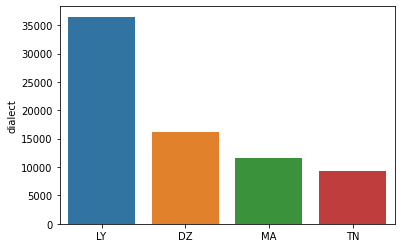

In [49]:
x=df_Maghreb['dialect'].value_counts()
print(x.index)
sns.barplot(x.index,x)

In [50]:
df_Maghreb.to_excel('data_maghreb.xlsx')

## Nile_Basin

In [51]:
df_nile_basin=df2.loc[(df2['dialect']=='SD') | (df2['dialect']=='EG')]

In [52]:
df_nile_basin

tokens dialect
244697  ÿßŸÑÿßŸÇŸäÿ¥ ŸÖÿπÿßŸÉ ÿßŸÑŸÅ Ÿäÿß ÿπŸÖ ŸÜÿ¨Ÿäÿ® ŸÇÿ±ÿ∂ ÿ≠ÿ≥ŸÜ ÿßÿ®ÿØÿß ÿ®ŸäŸáŸÖ ÿ≠...      EG
244698                         ÿßŸÜÿ™ ÿ®ÿ™ŸÅŸáŸÖ ŸÉŸÜÿ™ ÿ®ŸÇŸäÿ™ ÿ≤ŸÖŸÑŸÉÿßŸàŸä      EG
244699                                      ŸàŸÑŸàŸÑŸàÿß Ÿàÿ≥ŸÉÿ™Ÿàÿß      EG
244700                          Ÿàÿßÿ≠ÿØŸá ÿπÿ¥ÿßŸÜ ÿ®Ÿàÿßÿ® ŸÖŸÑŸÉÿ¥ ÿπÿßÿ≤Ÿá      EG
244701              ÿ¨ŸÜÿ≥Ÿäÿ™ŸÉ ÿßŸäŸá ÿØŸá ÿßŸÜÿ™ ÿµŸáŸäŸàŸÜŸä ŸÖÿ¥ Ÿáÿ™ŸÇŸàŸÑ ŸÉÿØŸá      EG
...                                                   ...     ...
405604  ÿßŸÑŸÜÿßÿ≥ ÿØŸä ÿ®ÿ™ŸÜŸÅÿÆ ŸÇÿ±ÿ®Ÿá ŸÖŸÇÿØŸàÿØŸá ÿ®ÿßŸÑÿØÿßÿ±ÿ¨Ÿä ŸÉÿØŸá ÿßŸÑÿ®ŸÑÿØ ...      SD
405605      ÿßŸÜÿ™ ÿπÿßŸäÿ¥ ŸàŸäŸÜ ÿ®ÿ±Ÿá ÿßŸÑÿ≥ŸàÿØÿßŸÜ ÿ¥ŸÜŸà ŸÖÿßÿ¥ÿßŸäŸÅ ÿßŸÑÿ®ÿ≠ÿµŸÑ ÿØÿß      SD
405606          ŸÖÿßÿßÿ≠ÿ±ŸÖ ŸÖŸäÿ≥Ÿä ÿ≠ÿ±ŸäŸÅ ŸàŸÑÿπÿßÿ® ÿ®ÿ±ÿ∂Ÿà ŸÖÿØÿ±ŸäÿØŸä ŸàÿßŸÅÿ™ÿÆÿ±      SD
405607  ŸäÿßÿÆŸä ÿØŸäŸÑ ŸÖÿßÿÆŸÑŸà ŸÑŸÑÿ¥Ÿäÿ∑ÿßŸÜ Ÿàÿ•ÿ®ŸÑŸäÿ≥ ÿ¥Ÿä Ÿäÿ±Ÿàÿ≠Ÿà ŸàŸäŸÜ ÿ±ÿ®ŸÜ...      SD
405608                       ÿßŸÑŸÜÿ®Ÿä ÿµÿØŸÖÿ™ŸÜŸä ŸäÿßÿÆŸä ÿπÿßŸàÿ≤ ÿ™ÿπŸàŸäÿ∂      SD

[72018 rows x 2 columns]

Index(['EG', 'SD'], dtype='object')


D:\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='dialect'>

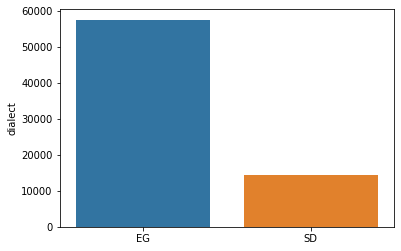

In [53]:
x=df_nile_basin['dialect'].value_counts()
print(x.index)
sns.barplot(x.index,x)

In [54]:
df_nile_basin.to_excel("data_nile_basin.xlsx")

## Levant

In [55]:
df_levant=df2.loc[(df2['dialect']=='LB') | (df2['dialect']=='JO') | (df2['dialect']=='PL') | (df2['dialect']=='SY')]

In [56]:
df_levant

tokens dialect
83065           ÿ¨ŸÖÿπÿ™ŸáŸÖ ÿ®ÿßŸÑÿµÿ±ŸÖÿßŸäŸá ÿπÿµÿ®ŸÜ ÿ¥ÿßÿ±ÿ® ÿπÿßÿØŸÑ ÿßŸÑÿ¨ÿ®Ÿäÿ±      PL
83066                 ÿ≥ŸàÿØ ÿßŸÑŸÑŸá Ÿàÿ¨Ÿá ÿßŸÑ ÿ≥ÿπŸàÿØ ÿ≤ÿ±ÿßŸÇ Ÿàÿ≠ŸàŸáŸáŸÖ      PL
83067      ŸÉŸÑÿßŸÖ ÿßŸÑŸÑŸäŸÑ ŸÖÿØŸáŸàŸÜ ÿ®ÿ≤ÿ®ÿØŸá ŸàÿßŸÜ ÿ∑ŸÑÿπ ÿßŸÑŸÜŸáÿßÿ± ÿ®ÿ≥ÿ≥Ÿäÿ≠      PL
83068             ŸÖŸäŸÜ ÿßŸÑŸä ÿ¥ÿßÿ∫ŸÑ ÿ®ÿßŸÑŸÉ ÿ≥ŸÖŸäÿ±ÿß Ÿäÿß ÿµÿ∫Ÿäÿ±Ÿá ÿπÿ®ÿ±      PL
83069                                          ŸÖŸÜÿµŸàÿ±Ÿá       PL
...                                                ...     ...
329945                             ÿÆÿßÿ¶ŸÜ ÿ≠ÿ®Ÿäÿ® ÿµÿßÿ± ÿßŸÑŸàŸÇÿ™      LB
329946  ÿßŸÑŸÖŸÇÿßŸàŸÖŸá ÿ®ÿßŸÇŸäŸá ÿ®ÿßŸÇŸäŸá ÿ®ÿßŸÇŸäŸá ÿµŸàÿ™ ÿßŸÑŸÖŸÇÿßŸàŸÖŸá ŸàÿµÿØÿßŸáÿß      LB
329947      ŸÑŸäÿ¥ ÿ®ÿ™ÿ≤ŸÑŸà ÿπÿßŸÑÿ∂ÿßÿ≠ŸäŸá ŸÜŸÖÿ± ÿ≤ÿ±ŸÇÿß ÿπŸÖ ÿ™ÿ¥ÿ™ÿ∫ŸÑ ÿ™ÿßŸÉÿ≥Ÿä      LB
329948                             ÿ®ÿ≠ÿ®ŸÉ ÿ®ÿ≥ ÿ®ÿπÿ±ŸÅ ŸÖÿ¥ ÿßŸÑŸä      LB
329949  ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá ŸàÿπÿßŸäÿ¥ŸäŸÜ ÿßÿ≠ŸÑŸâ ÿ≠ŸäÿßŸá ÿπÿßŸäÿ≤ŸäŸÜ ÿ≥ÿπŸàÿØŸäŸá ÿßŸáŸÑŸáÿß      LB

[115486 rows x 2 columns]

Index(['PL', 'JO', 'LB', 'SY'], dtype='object')


D:\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='dialect'>

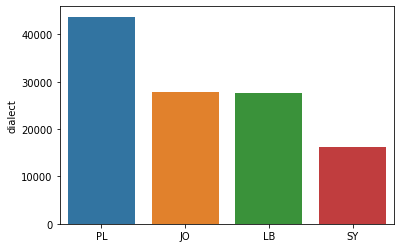

In [57]:
x=df_levant['dialect'].value_counts()
print(x.index)
sns.barplot(x.index,x)

In [58]:
df_levant.to_excel("data_levant.xlsx")

## Gulf

In [59]:
df_gulf=df2.loc[(df2['dialect']=='SA') | (df2['dialect']=='BH') | (df2['dialect']=='AE') | (df2['dialect']=='QA') | (df2['dialect']=='KW') | (df2['dialect']=='OM')]

In [60]:
df_gulf

tokens dialect
51996   ÿ¥ŸÅÿ™ŸÉ ÿ≠ÿßÿ∑ ÿµŸàÿ±Ÿá ŸàŸÑÿØ ÿßŸÑŸÜÿπÿßÿ¥Ÿá ÿßŸÑŸÜÿ¨ÿ≥ ŸàÿßŸÜÿß ÿ∫ÿßÿ≥ŸÑ ŸäÿØŸä ...      QA
51997   ŸÖÿ≠ÿØ ÿØÿßÿ≥ ÿ∑ÿ±ŸÅ ŸäÿßŸÑÿ∞ŸÜÿ® Ÿàÿ¥ ÿ¨ÿßÿ®ŸÉ ÿ™ÿ∫ÿ±ŸäÿØŸá ŸÑÿ™ÿßÿ¨ ÿ±ÿßÿ≥ŸÉ ÿ™ŸÖ...      QA
51998   ŸàŸäŸÜ ÿßŸÜÿ™ ÿ±ÿßŸäÿ≠ Ÿäÿßÿ®ŸÜ ÿ≠ÿ¨ŸäŸÑÿßŸÜ ÿßŸÑÿ™ÿ≤ŸÖ ÿßŸÑÿµŸÖÿ™ ŸÑÿßŸÜ ŸÖŸÑŸÉ ÿß...      QA
51999   ŸäÿßÿÆŸä ÿßŸÜÿ™ ŸÖÿßÿ™ÿ™Ÿàÿ® ÿßŸÜÿß ŸÇÿßŸäŸÑŸÉ ÿßÿ¥ŸàŸÅŸÉ ÿ®ÿ™ÿ∫ÿ±ŸäÿØŸá ÿ™ÿÆÿµ ÿ¥Ÿä...      QA
52000   ŸÇŸÑÿ™Ÿáÿß ŸäÿßŸÑÿ≥ŸÑŸàŸÇŸä ÿßŸÑŸÅ ŸÖÿ±Ÿá ŸÑÿßŸÉŸÜ ÿßŸÑÿßŸÜÿ¨ÿßÿ≥ ŸÖÿßÿ™ÿ™Ÿàÿ® ÿπÿØÿ™...      QA
...                                                   ...     ...
458192                               ŸÖÿ®ÿ≥Ÿàÿ∑ŸäŸÜ ÿßŸÑŸÑŸä ÿ®ÿßÿ≥ÿ∑ÿßŸÜÿß      BH
458193                                    ŸÖÿßŸäŸÜÿØŸá ÿßÿ®ÿ¥ ŸäÿÆÿ™Ÿä      BH
458194      ÿ¥Ÿà ÿπŸÖŸÑŸÜÿß ÿ≠ŸÜÿß ÿ™Ÿáÿ±ÿ®Ÿä ÿßÿ≠ŸÜÿß ŸÖÿ≥ÿßŸÉŸäŸÜ ŸÑŸäÿ¥ ÿ®ÿ™ÿπŸÖŸÑŸä ŸáŸäŸÉ      BH
458195                               ÿßŸÑŸÑŸá Ÿäÿ®ÿßÿ±ŸÉ Ÿàÿ®ÿßŸÑÿπÿßŸÅŸäŸá      BH
458196                            ÿßŸÑÿ≥ÿ≠ŸÑŸá ÿ∂ŸäŸÅŸä ÿ®ÿ™ÿ∑ŸÑÿπ ÿ≥ÿ≠ŸÑŸäŸá      BH

[171684 rows x 2 columns]

In [61]:
df_gulf.isnull().sum()

tokens     0
dialect    0
dtype: int64

Index(['KW', 'QA', 'SA', 'AE', 'BH', 'OM'], dtype='object')


D:\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='dialect'>

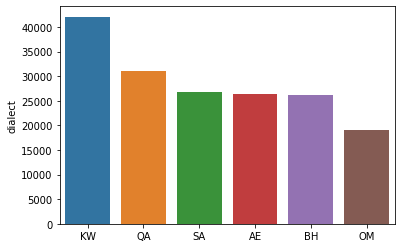

In [62]:
x=df_gulf['dialect'].value_counts()
print(x.index)
sns.barplot(x.index,x)

In [63]:
df_gulf.to_excel('data_gulf.xlsx')

## Main 

In [64]:
df2.loc[(df2['dialect']=='DZ') | (df2['dialect']=='TN') | (df2['dialect']=='MA') | (df2['dialect']=='LY'),["dialect"]]='MAGHERB'
df2.loc[(df2['dialect']=='SD') | (df2['dialect']=='EG'),"dialect"]='NILE BASIN'
df2.loc[(df2['dialect']=='LB') | (df2['dialect']=='JO') | (df2['dialect']=='PL') | (df2['dialect']=='SY'),["dialect"]]='LEVANT'
df2.loc[(df2['dialect']=='SA') | (df2['dialect']=='BH') | (df2['dialect']=='AE') | (df2['dialect']=='QA') | (df2['dialect']=='KW') | (df2['dialect']=='OM'),["dialect"]]='GULF'

D:\anaconda1\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\anaconda1\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [65]:
df2

tokens dialect
0                                     ÿ®ÿßŸÑŸÜŸáÿßŸäŸá ŸäŸÜÿ™ŸÅÿ∂ Ÿäÿ∫Ÿäÿ±      IQ
1       ŸäÿπŸÜŸä ŸÖÿ≠ÿ≥Ÿàÿ® ÿßŸÑÿ®ÿ¥ÿ± ÿ≠ŸäŸàŸÜŸá ŸàŸàÿ≠ÿ¥ŸäŸá Ÿàÿ™ÿ∑ŸÑÿ®ŸàŸÜ ÿßŸÑÿ∫ÿ±ÿ® Ÿäÿ≠...      IQ
2                                        ŸÖÿ®ŸäŸÜ ŸÉŸÑÿßŸÖŸá ÿÆŸÑŸäÿ¨Ÿä      IQ
3                               Ÿäÿ≥ŸÑŸÖŸÑŸä ŸÖÿ±Ÿàÿ±ŸÉ Ÿàÿ±Ÿàÿ≠ŸÉ ÿßŸÑÿ≠ŸÑŸàŸá      IQ
4                                      ŸàŸäŸÜ ÿßŸÑÿ∫Ÿäÿ®Ÿá ÿßÿÆ ŸÖÿ≠ŸÖÿØ      IQ
...                                                   ...     ...
458192                               ŸÖÿ®ÿ≥Ÿàÿ∑ŸäŸÜ ÿßŸÑŸÑŸä ÿ®ÿßÿ≥ÿ∑ÿßŸÜÿß    GULF
458193                                    ŸÖÿßŸäŸÜÿØŸá ÿßÿ®ÿ¥ ŸäÿÆÿ™Ÿä    GULF
458194      ÿ¥Ÿà ÿπŸÖŸÑŸÜÿß ÿ≠ŸÜÿß ÿ™Ÿáÿ±ÿ®Ÿä ÿßÿ≠ŸÜÿß ŸÖÿ≥ÿßŸÉŸäŸÜ ŸÑŸäÿ¥ ÿ®ÿ™ÿπŸÖŸÑŸä ŸáŸäŸÉ    GULF
458195                               ÿßŸÑŸÑŸá Ÿäÿ®ÿßÿ±ŸÉ Ÿàÿ®ÿßŸÑÿπÿßŸÅŸäŸá    GULF
458196                            ÿßŸÑÿ≥ÿ≠ŸÑŸá ÿ∂ŸäŸÅŸä ÿ®ÿ™ÿ∑ŸÑÿπ ÿ≥ÿ≠ŸÑŸäŸá    GULF

[458040 rows x 2 columns]

In [66]:
df2.to_excel("data_main.xlsx")

In [67]:
df2['dialect'].value_counts()

GULF          171684
LEVANT        115486
MAGHERB        73442
NILE BASIN     72018
IQ             15490
YE              9920
Name: dialect, dtype: int64

In [68]:
df2.loc[df2['tokens']==" "]

Empty DataFrame
Columns: [tokens, dialect]
Index: []

Index(['GULF', 'LEVANT', 'MAGHERB', 'NILE BASIN', 'IQ', 'YE'], dtype='object')


D:\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='dialect'>

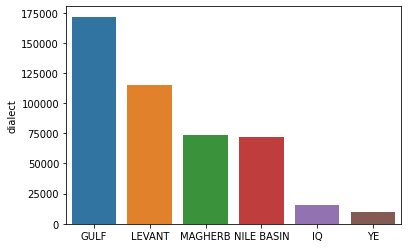

In [69]:
x=df2['dialect'].value_counts()
print(x.index)
sns.barplot(x.index,x)

## WordCloud for main dataframe

In [70]:
comment_words = ''
for tweet in df2['tokens']:
        
        tokens = tweet.split()
        comment_words += " ".join(tokens)+" "

# text = arabic_reshaper.reshape(comment_words)

In [71]:
with open('text.txt', 'w', encoding='utf-8') as f:
    f.write(comment_words)

In [72]:
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper 
import numpy as np
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

f = codecs.open( 'text.txt', 'r', 'utf-8')

# Make text readable for a non-Arabic library like wordcloud
text = arabic_reshaper.reshape(f.read())

text = get_display(text)

# Generate a word cloud image


In [73]:
# Generate a word cloud image
wordcloud = WordCloud(font_path='arial', background_color='white',
                        mode='RGB', width=2000, height=1000).generate(text)
# Export to an image
wordcloud.to_file("arabic_example.png")

In [74]:
#pip install wordcloud

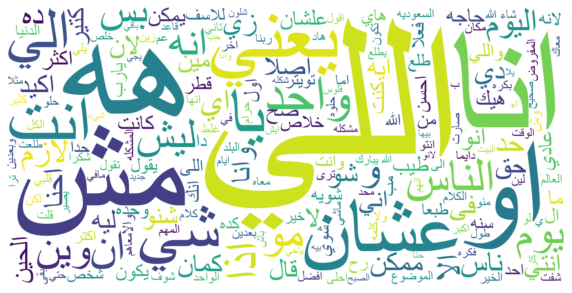

In [75]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
